# **1. Import Library**


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np
import re
import os

In [53]:
# Đọc file
from google.colab import drive
drive.mount('/content/drive')

# file_input: File đầu vào có định dạng .csv
def read_file(file_input):
  # Đường dẫn tới thư mục Hackathon
  BASE_PATH = '/content/drive/MyDrive/Hackathon/data/'

  # Đọc file .csv tương ứng với mục cần làm
  file_path = BASE_PATH + file_input
  df = pd.read_csv(file_path)

  if not df.empty:
    print(f"Đọc file {file_input} thành công!")
  else:
    print(f"Đọc file {file_input} không thành công")
    return []

  return df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Tổng quan ngành & Vị thế cạnh tranh**

In [54]:
# Đọc file "Vi_mo_nganh.csv"
macro_file = "Vi_mo_nganh.csv"
df_macro = read_file(macro_file)


Đọc file Vi_mo_nganh.csv thành công!


# **3. Phân tích cơ bản**

In [35]:
# Đọc file về "Tai_Chinh_KDH.csv" về tài chính công ty KDH

finance_file = "Tai_chinh_KDH.csv"
df_finance = read_file(finance_file)

# Đọc file về "Co_phieu_KDH.csv" về giá cổ phiếu công ty KDH
stock_file = "Co_phieu_KDH.csv"
df_stock = read_file(stock_file)




Đọc file Tai_chinh_KDH.csv thành công!
Đọc file Co_phieu_KDH.csv thành công!


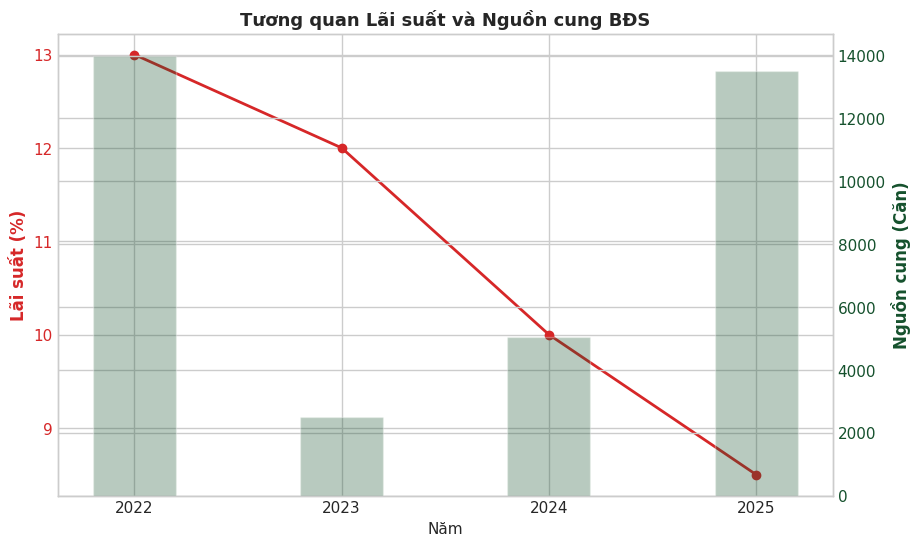

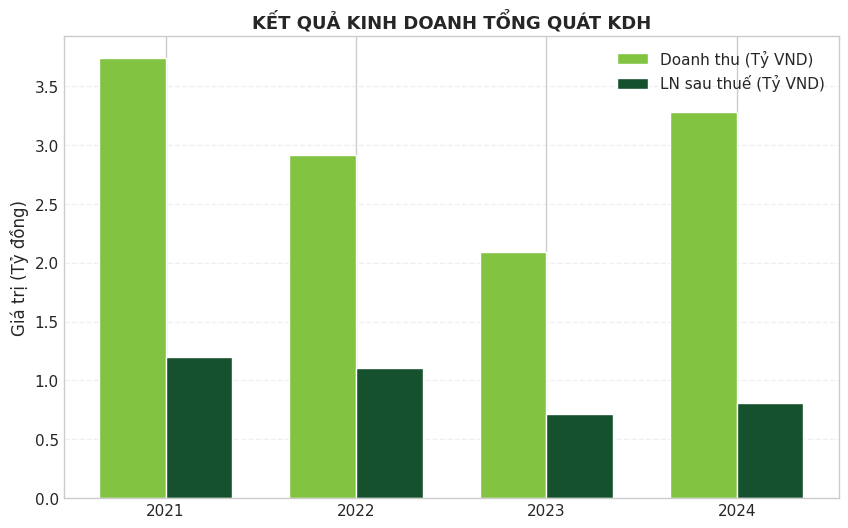

In [36]:
# 1. Biểu đồ Vĩ mô và Ngành
KDH_DARK_GREEN = '#15512D' # Màu xanh đậm chủ đạo
KDH_LIGHT_GREEN = '#82C341' # Xanh lá sáng

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Năm', fontsize=11)
ax1.set_ylabel('Lãi suất (%)', color='#d62728', fontweight='bold')
ax1.plot(df_macro['Thời gian (Năm)'], df_macro.iloc[:, 1] * 100, marker='o', color='#d62728', linewidth=2)
ax1.tick_params(axis='y', labelcolor='#d62728')

# --- FIX TRỤC X TẠI ĐÂY ---
# Ép trục X chỉ hiển thị các giá trị năm nguyên từ dữ liệu
ax1.set_xticks(df_macro['Thời gian (Năm)'])
ax2 = ax1.twinx()
ax2.set_ylabel('Nguồn cung (Căn)', color=KDH_DARK_GREEN, fontweight='bold')
ax2.bar(df_macro['Thời gian (Năm)'], df_macro.iloc[:, 2], color=KDH_DARK_GREEN, alpha=0.3, width=0.4)
ax2.tick_params(axis='y', labelcolor=KDH_DARK_GREEN)

plt.title('Tương quan Lãi suất và Nguồn cung BĐS', fontsize=13, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.3) # Thêm lưới dọc để dễ nhìn theo năm

# 2. Biểu đồ Kết quả kinh doanh KDH
def clean_num(val):
 return float(str(val).replace(',', '').strip())

years = ['2021', '2022', '2023', '2024']
rev_row = df_stock[df_stock['Chỉ tiêu '].str.contains('Doanh thu thuần')].iloc[0]
npat_row = df_stock[df_stock['Chỉ tiêu '].str.contains('Lợi nhuận sau thuế của cổ đông công ty mẹ')].iloc[0]

revenue = [clean_num(rev_row[y]) / 1e9 for y in years]
npat = [clean_num(npat_row[y]) / 1e9 for y in years]

x = np.arange(len(years))
width = 0.35

plt.figure(figsize=(10, 6))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Times New Roman', 'Verdana']

# 3. Khắc phục lỗi dấu âm (-) bị lỗi khi đổi font
plt.rcParams['axes.unicode_minus'] = False

plt.bar(x - width/2, revenue, width, label='Doanh thu (Tỷ VND)', color=KDH_LIGHT_GREEN)
plt.bar(x + width/2, npat, width, label='LN sau thuế (Tỷ VND)', color=KDH_DARK_GREEN)

# Fix nhãn trục X cho biểu đồ cột
plt.xticks(x, years)
plt.ylabel('Giá trị (Tỷ đồng)')
plt.title('KẾT QUẢ KINH DOANH TỔNG QUÁT KDH', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

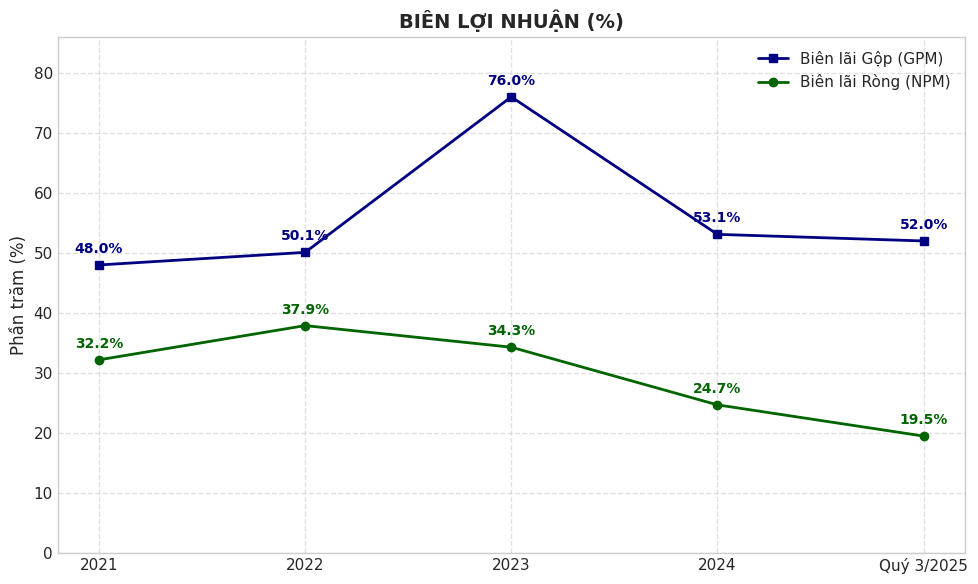

In [38]:
plt.figure(figsize=(10, 6))


years = ['2021', '2022', '2023', '2024', 'Quý 3/2025']
gms = [48.0, 50.1, 76.0, 53.1, 52.0]
nms = [32.2, 37.9, 34.3, 24.7, 19.5]

# --- VẼ BIỂU ĐỒ ---

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Times New Roman', 'Verdana']

# 3. Khắc phục lỗi dấu âm (-) bị lỗi khi đổi font
plt.rcParams['axes.unicode_minus'] = False
# 1. Đường Biên lãi Gộp (Dùng màu Navy để làm nền tương phản)
plt.plot(years, gms, marker='s', label='Biên lãi Gộp (GPM)',
linewidth=2, color='navy', markersize=6)

# 2. Đường Biên lãi Ròng (Màu darkgreen như yêu cầu)
plt.plot(years, nms, marker='o', label='Biên lãi Ròng (NPM)',
linewidth=2, color='darkgreen', markersize=6)

# --- THÊM GIÁ TRỊ LÊN ĐIỂM MỐC (Data Labels) ---
# Hàm zip giúp lặp qua 2 danh sách cùng lúc (Năm và Giá trị)
for x, y in zip(years, gms):
 plt.text(x, y + 1.5,# Tọa độ x, y (cộng thêm 1.5 để chữ nằm trên điểm)
 f'{y}%',# Nội dung chữ
 ha='center',  # Căn giữa theo chiều ngang
 va='bottom',  # Căn đáy (chữ nằm trên điểm)
 fontsize=10,
 color='navy', fontweight='bold')

for x, y in zip(years, nms):
 plt.text(x, y + 1.5,
 f'{y}%',
 ha='center',
 va='bottom',
 fontsize=10,
 color='darkgreen', fontweight='bold')

# --- TRANG TRÍ ---
plt.title('BIÊN LỢI NHUẬN (%)', fontweight='bold', fontsize=14)
plt.ylabel('Phần trăm (%)')
plt.legend(loc='upper right') # Đặt chú thích góc phải
plt.grid(True, linestyle='--', alpha=0.6)

# Mở rộng giới hạn trục Y một chút để chữ số cao nhất không bị cắt mất
plt.ylim(0, max(gms) + 10)

plt.tight_layout()
plt.show()

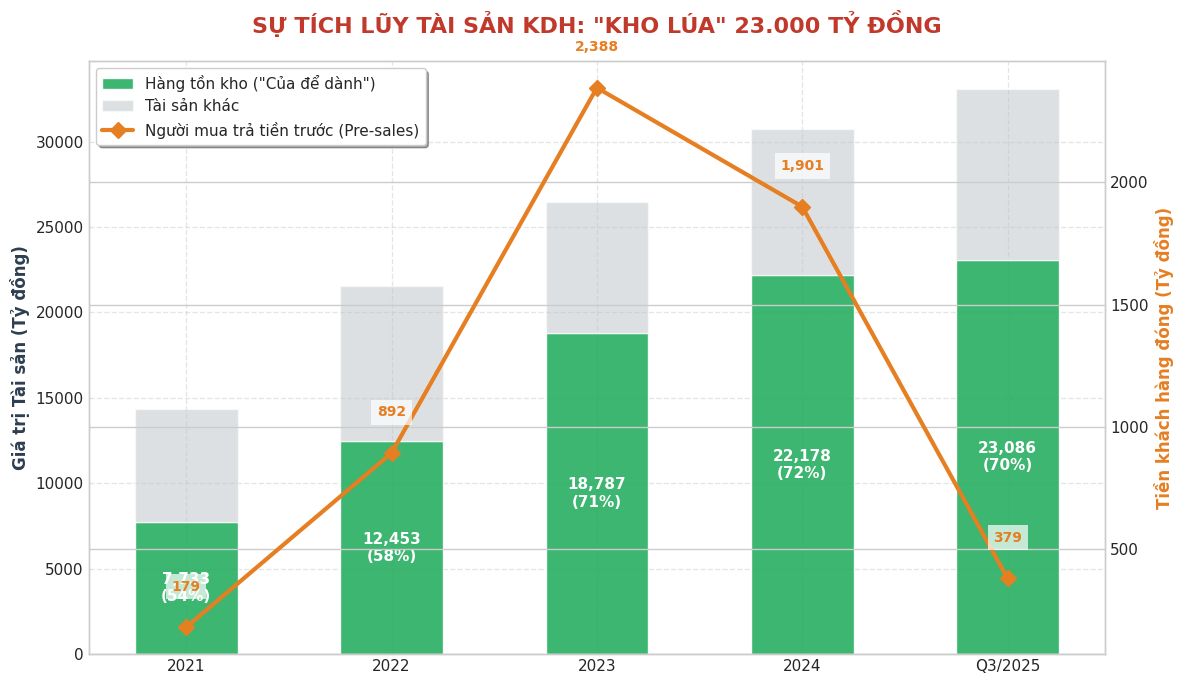

In [39]:
# DỮ LIỆU TÀI CHÍNH KDH (2021 - Q3/2025)
data = {
 'Năm': ['2021', '2022', '2023', '2024', 'Q3/2025'],
 'Tổng Tài sản': [14373, 21539, 26481, 30758, 33081],
 'Hàng tồn kho': [7733, 12453, 18787, 22178, 23086],
 'Người mua trả trước': [179, 892, 2388, 1901, 379]
}
df = pd.DataFrame(data)

# TÍNH TOÁN TỶ TRỌNG
df['Tỷ trọng Tồn kho (%)'] = (df['Hàng tồn kho'] / df['Tổng Tài sản']) * 100

# VẼ BIỂU ĐỒ (COMBO CHART)
fig, ax1 = plt.subplots(figsize=(12, 7))
plt.style.use('seaborn-v0_8-whitegrid')


plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Times New Roman', 'Verdana']

# 3. Khắc phục lỗi dấu âm (-) bị lỗi khi đổi font
plt.rcParams['axes.unicode_minus'] = False

# 1. TRỤC CHÍNH: QUY MÔ TÀI SẢN (CỘT)
# Vẽ Hàng tồn kho (Màu xanh lá - Tượng trưng cho đất/dự án)
bars1 = ax1.bar(df['Năm'], df['Hàng tồn kho'], color='#27ae60', label='Hàng tồn kho ("Của để dành")', alpha=0.9, width=0.5, zorder=2)

# Vẽ Tài sản còn lại (Màu xám nhạt)
assets_rest = df['Tổng Tài sản'] - df['Hàng tồn kho']
ax1.bar(df['Năm'], assets_rest, bottom=df['Hàng tồn kho'], color='#bdc3c7', label='Tài sản khác', alpha=0.5, width=0.5, zorder=2)

# Thiết lập trục 1
ax1.set_ylabel('Giá trị Tài sản (Tỷ đồng)', fontsize=12, fontweight='bold', color='#2c3e50')
ax1.set_title('SỰ TÍCH LŨY TÀI SẢN KDH: "KHO LÚA" 23.000 TỶ ĐỒNG', fontsize=16, fontweight='bold', color='#c0392b', pad=20)
ax1.grid(True, linestyle='--', alpha=0.5, zorder=0)

# 2. TRỤC PHỤ: DÒNG TIỀN KHÁCH HÀNG (ĐƯỜNG)
ax2 = ax1.twinx()
line1 = ax2.plot(df['Năm'], df['Người mua trả trước'], color='#e67e22', marker='D', markersize=8, linewidth=3, label='Người mua trả tiền trước (Pre-sales)', zorder=3)
ax2.set_ylabel('Tiền khách hàng đóng (Tỷ đồng)', fontsize=12, fontweight='bold', color='#e67e22')

# 3. GẮN NHÃN GIÁ TRỊ (ANNOTATIONS)
# Nhãn cho Hàng tồn kho
for i, v in enumerate(df['Hàng tồn kho']):
 ax1.text(i, v/2, f"{v:,.0f}\n({df['Tỷ trọng Tồn kho (%)'][i]:.0f}%)", ha='center', va='center', color='white', fontweight='bold', fontsize=11)

# Nhãn cho Người mua trả trước
for i, v in enumerate(df['Người mua trả trước']):
 ax2.text(i, v + 150, f"{v:,.0f}", ha='center', color='#e67e22', fontweight='bold', fontsize=10, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# 4. HOÀN THIỆN LEGEND
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=11, frameon=True, shadow=True)

plt.tight_layout()
plt.show()

Đọc file no_vay.csv thành công!


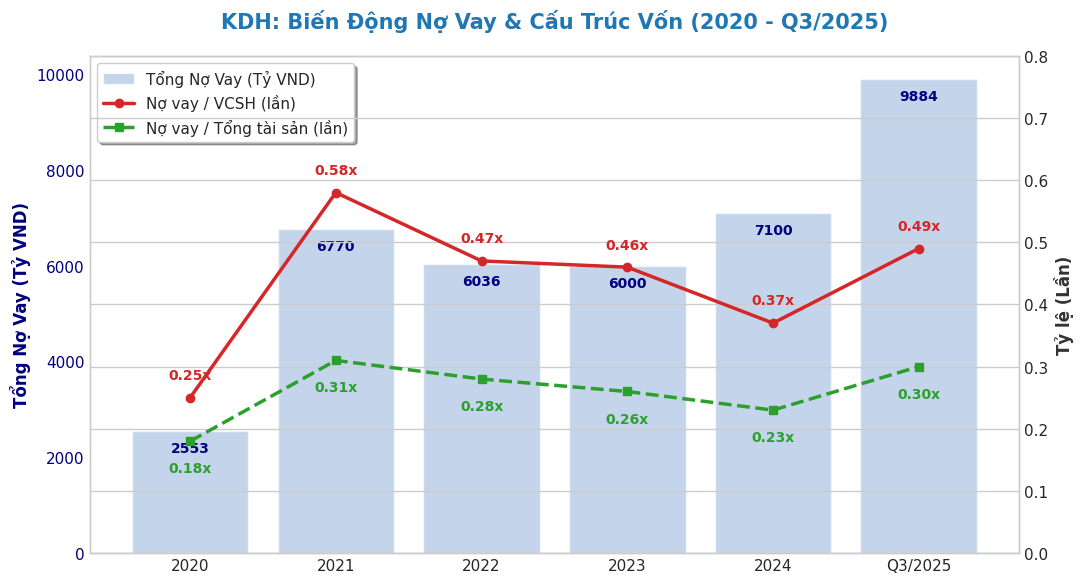

In [52]:
# 1. DỮ LIỆU CẬP NHẬT MỚI NHẤT (2020 - Q3/2025)
df_fin = read_file("no_vay.csv")
# ---------------------------------------------------------
# 2. VẼ BIỂU ĐỒ KẾT HỢP (DUAL AXIS CHART)
# ---------------------------------------------------------
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Times New Roman', 'Verdana']

# 3. Khắc phục lỗi dấu âm (-) bị lỗi khi đổi font
plt.rcParams['axes.unicode_minus'] = False
fig, ax1 = plt.subplots(figsize=(11, 6)) # Tăng chiều rộng một chút

# --- Trục trái (Bar chart): Tổng Nợ Vay ---
color_bar = "#9db9de"
bars = ax1.bar(df_fin['Nam'], df_fin['Tong_No_Vay'], color=color_bar, alpha=0.6, label='Tổng Nợ Vay (Tỷ VND)')
ax1.set_ylabel('Tổng Nợ Vay (Tỷ VND)', fontsize=12, color='navy', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.grid(False)

# Thêm nhãn giá trị lên cột (Số tiền)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height - 500,
             f'{int(height)}', ha='center', va='bottom', color='navy', fontsize=10, fontweight='bold')

# --- Trục phải (Line chart): Các tỷ lệ tài chính (%) ---
ax2 = ax1.twinx()

# Đường 1: Nợ/VCSH (D/E)
color_de = '#d62728' # Đỏ
ax2.plot(df_fin['Nam'], df_fin['Ty_Le_No_VCSH'], color=color_de, marker='o', linewidth=2.5, label='Nợ vay / VCSH (lần)')

# Đường 2: Nợ/Tổng tài sản (D/A)
color_da = '#2ca02c' # Xanh lá
ax2.plot(df_fin['Nam'], df_fin['Ty_Le_No_TTS'], color=color_da, marker='s', linewidth=2.5, linestyle='--', label='Nợ vay / Tổng tài sản (lần)')

ax2.set_ylabel('Tỷ lệ (Lần)', fontsize=12, color='#333333', fontweight='bold')
ax2.set_ylim(0, 0.8)

# Thêm nhãn giá trị lên đường (Tỷ lệ)
for i, v in enumerate(df_fin['Ty_Le_No_VCSH']):
    ax2.text(i, v + 0.03, f"{v:.2f}x", ha='center', color=color_de, fontweight='bold', fontsize=10)

for i, v in enumerate(df_fin['Ty_Le_No_TTS']):
    ax2.text(i, v - 0.05, f"{v:.2f}x", ha='center', color=color_da, fontweight='bold', fontsize=10)

# --- Hoàn thiện ---
plt.title('KDH: Biến Động Nợ Vay & Cấu Trúc Vốn (2020 - Q3/2025)', fontsize=15, fontweight='bold', pad=20, color='#1f77b4')

# Legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

# **4. Dự án & Đối thủ cạnh tranh**

In [43]:
# Đọc file "duan1.csv" về các dự án của công ty KDH
project_file = "duan1.csv"
df_project = read_file(project_file)

# ĐỌc file về "doithu.csv" về các số liệu công ty đối thủ KDH
enemy_file = "doithu.csv"
df_enemy = read_file(enemy_file)

Đọc file duan1.csv thành công!
Đọc file doithu.csv thành công!


## 4.1: Dự án công ty Khang Điền

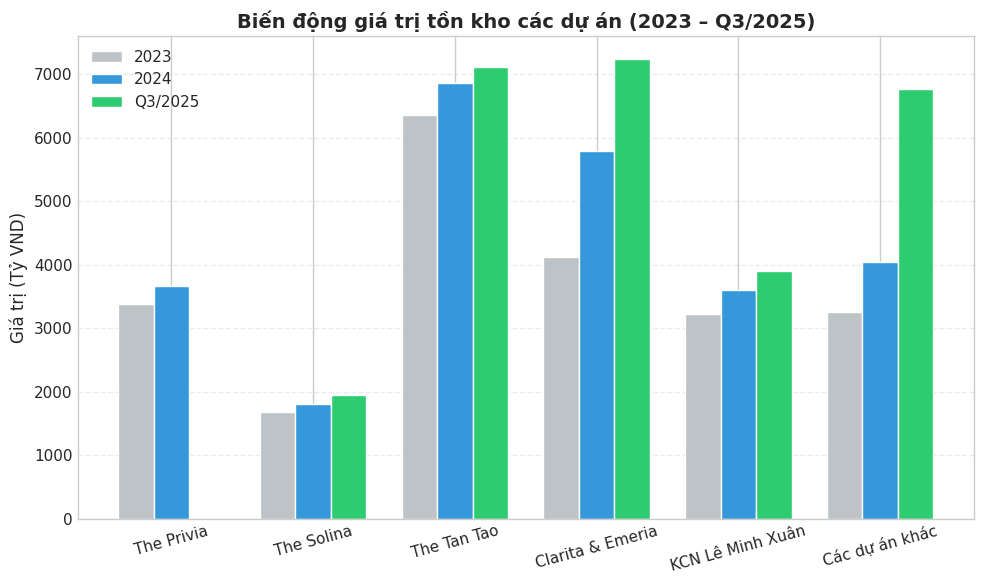

In [40]:
df = df_project
df.columns = [
    'Nhom_Tai_San', 'Ten_Du_An', '2023', '2024',
    'Q3_2025', 'Dien_Tich', 'Trang_Thai', 'Ty_Trong_Ton_Kho'
]

# 3. Rút gọn tên dự án
name_map = {
    'Khu nhà ở Đoàn Nguyên (The Privia)': 'The Privia',
    'The Solina': 'The Solina',
    'Khu dân cư Tân Tạo (The Tan Tao)': 'The Tan Tao',
    'Khu nhà ở Bình Trưng Đông (The Clarita & Emeria)': 'Clarita & Emeria',
    'Khu công nghiệp Lê Minh Xuân (mở rộng)': 'KCN Lê Minh Xuân'
}
df['Ten_Du_An'] = df['Ten_Du_An'].map(name_map).fillna(df['Ten_Du_An'])

# ================== VẼ BIỂU ĐỒ ==================
# --- 2. VẼ BIỂU ĐỒ CỘT NHÓM ---
plt.figure(figsize=(10, 6))
x = np.arange(len(df['Ten_Du_An']))
width = 0.25

plt.bar(x - width, df['2023'], width, label='2023', color='#bdc3c7')
plt.bar(x, df['2024'], width, label='2024', color='#3498db')
plt.bar(x + width, df['Q3_2025'], width, label='Q3/2025', color='#2ecc71')

plt.title('Biến động giá trị tồn kho các dự án (2023 – Q3/2025)', fontsize=14, fontweight='bold')
plt.ylabel('Giá trị (Tỷ VND)')
plt.xticks(x, df['Ten_Du_An'], rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('Chart1_BienDongGiaTri.png', dpi=300)
plt.show()


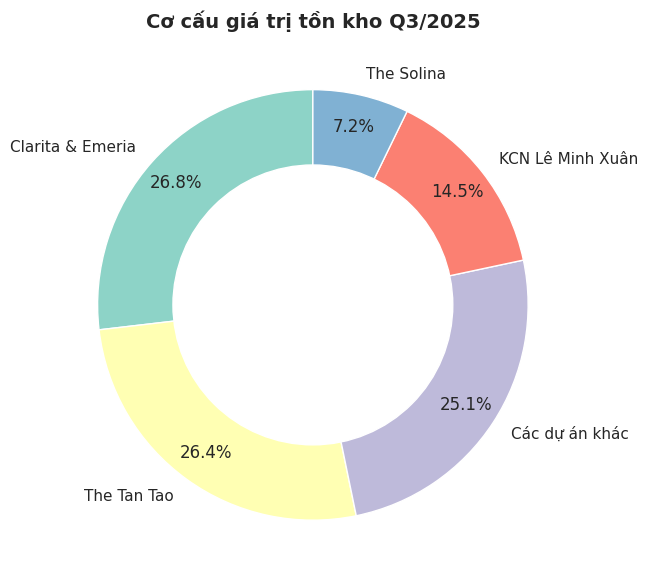

In [41]:
# --- VẼ BIỂU ĐỒ TRÒN (DONUT) ---
plt.figure(figsize=(10, 6))

# Lọc bỏ dự án đã bán hết (giá trị = 0)
df_pie = df[df['Q3_2025'] > 0].sort_values('Q3_2025', ascending=False)

plt.pie(
    df_pie['Q3_2025'],
    labels=df_pie['Ten_Du_An'],
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    colors=plt.cm.Set3.colors
)

# Tạo khoảng trắng ở giữa để thành biểu đồ Donut
centre_circle = plt.Circle((0, 0), 0.65, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Cơ cấu giá trị tồn kho Q3/2025', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('Chart2_CoCauTonKho.png', dpi=300)
plt.show()

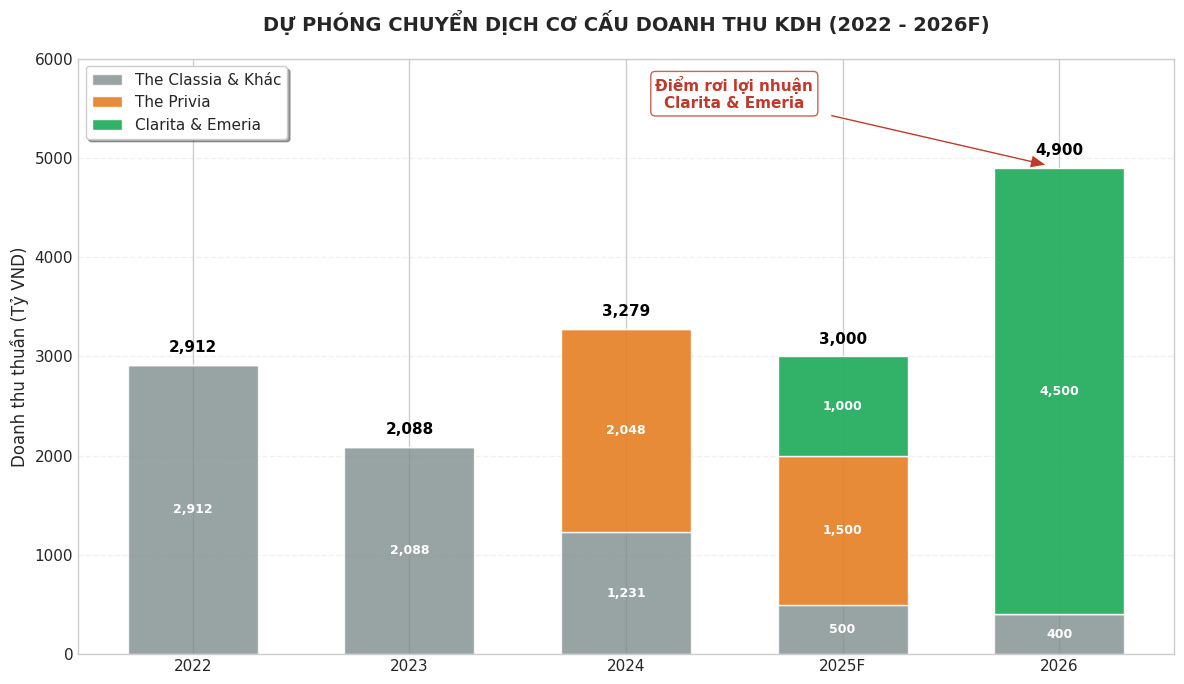

In [50]:
# 1. Dữ liệu (Đơn vị: Tỷ VND)
years = ['2022', '2023', '2024', '2025F', '2026']

# Nhóm 1: Dự án cũ & Khác (The Classia là chủ đạo 2022-2023)
# Xu hướng: Giảm dần khi bán hết hàng tồn kho
rev_others = np.array([2912, 2088, 1231, 500, 400])

# Nhóm 2: The Privia (Khu nhà ở Đoàn Nguyên)
# Xu hướng: Hình thành "đỉnh" vào 2024 và kết thúc vào giữa 2025
rev_privia = np.array([0, 0, 2048, 1500, 0])

# Nhóm 3: Clarita & Emeria (Gladia)
# Xu hướng: Bắt đầu từ cuối 2025 và bùng nổ mạnh mẽ vào 2026
rev_clarita = np.array([0, 0, 0, 1000, 4500])

# 2. Thiết lập biểu đồ
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.6

# Vẽ các lớp chồng lên nhau (Stacked Bar)
# Lớp 1: Nền tảng cũ (Màu Xám)
p1 = ax.bar(years, rev_others, width=bar_width,
            label='The Classia & Khác', color='#7f8c8d', alpha=0.8)

# Lớp 2: Động lực hiện tại - The Privia (Màu Cam)
p2 = ax.bar(years, rev_privia, width=bar_width, bottom=rev_others,
            label='The Privia', color='#e67e22', alpha=0.9)

# Lớp 3: Động lực tương lai - Clarita & Emeria (Màu Xanh lá đậm)
p3 = ax.bar(years, rev_clarita, width=bar_width, bottom=rev_others+rev_privia,
            label='Clarita & Emeria', color='#27ae60', alpha=0.95)

# 3. Trang trí & Chú thích
ax.set_ylabel('Doanh thu thuần (Tỷ VND)', fontsize=12)
ax.set_title('DỰ PHÓNG CHUYỂN DỊCH CƠ CẤU DOANH THU KDH (2022 - 2026F)',
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.set_ylim(0, 6000)

# 4. Thêm nhãn giá trị (Data Labels)
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0: # Chỉ hiện số nếu > 0
            ax.text(rect.get_x() + rect.get_width()/2., rect.get_y() + height/2.,
                    f'{int(height):,}',
                    ha='center', va='center', color='white', fontweight='bold', fontsize=9)

add_labels(p1)
add_labels(p2)
add_labels(p3)

# Nhãn Tổng doanh thu trên đỉnh cột
totals = rev_others + rev_privia + rev_clarita
for i, total in enumerate(totals):
    ax.text(i, total + 100, f'{int(total):,}', ha='center', va='bottom',
            fontweight='bold', color='black', fontsize=11)

# Chú thích cho năm 2026
ax.annotate('Điểm rơi lợi nhuận\nClarita & Emeria',
            xy=(4, 4900),
            xytext=(2.5, 5500),
            arrowprops=dict(facecolor='#c0392b', shrink=0.05, width=2, headwidth=10),
            fontsize=11, fontweight='bold', color='#c0392b',
            ha='center',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#c0392b", alpha=0.8))
plt.tight_layout()
plt.show()

## 4.2: Đối thủ cạnh tranh

In [44]:
# Đổi tên cột đầu tiên
df = df_enemy
df.rename(columns={df.columns[0]: 'Metric'}, inplace=True)
df.set_index('Metric', inplace=True)

# Chuyển vị
df_t = df.T

plt.style.use('ggplot')
print(df)

                      Khang Điền (KDH)  Đất Xanh Group (DXG)  \
Metric                                                         
P/E (Lần)                        34.55                  34.5   
P/B (Lần)                         1.85                   1.0   
ROE (%)                           6.40                   2.0   
Gross Margin (%)                 53.10                  53.0   
D/E (%)                          48.00                  55.0   
Nợ vay ròng/VCSH (%)             33.00                  26.0   
Tổng quỹ đất (ha)               600.00                 450.0   

                      Nam Long Group (NLG)  Vinhomes (VHM)  
Metric                                                      
P/E (Lần)                            38.98            4.90  
P/B (Lần)                             1.60            0.75  
ROE (%)                               4.00           16.60  
Gross Margin (%)                     43.50           35.50  
D/E (%)                              44.00           65.0

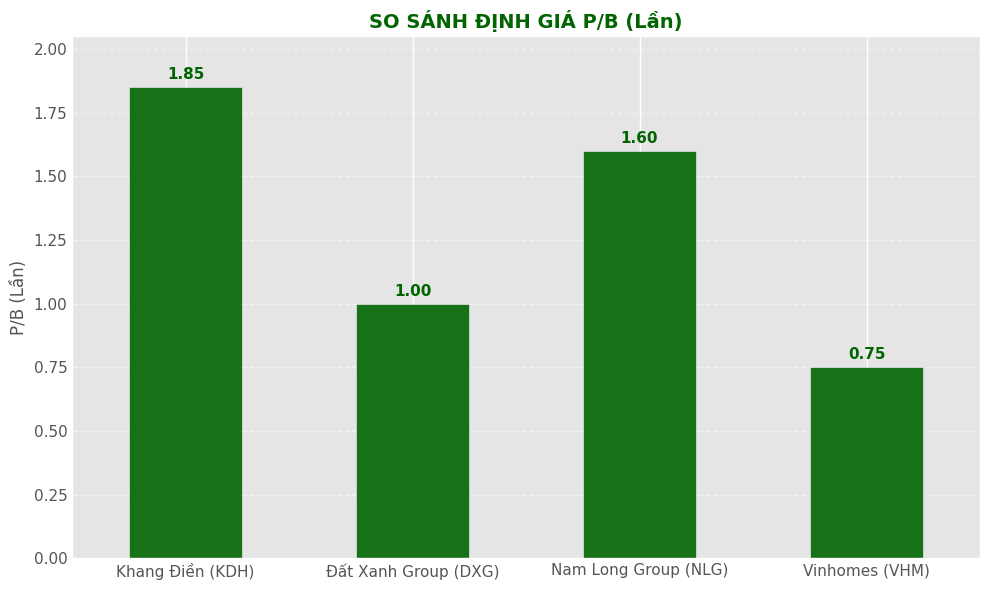

In [45]:
# --- BƯỚC 2: VẼ BIỂU ĐỒ ---
# Tăng figsize lên (10, 6) để các cột có nhiều không gian hơn
fig, ax = plt.subplots(figsize=(10, 6))

df_t[['P/B (Lần)']].plot(
    kind='bar',
    legend=False,
    color='darkgreen', # 1. Đổi màu chủ đạo
    alpha=0.9,
    width=0.5,         # 2. Chỉnh khoảng cách (0.5 là chuẩn, nhỏ hơn thì cột xa nhau hơn)
    ax=ax,
    rot=0              # Giữ nhãn nằm ngang
)

# Trang trí
plt.title('SO SÁNH ĐỊNH GIÁ P/B (Lần)', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('P/B (Lần)')
plt.xlabel('') # Bỏ chữ "Mã CP" cho đỡ rối

# Ghi nhãn số liệu lên đầu cột
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height() + 0.02, # Nhích lên một chút cho thoáng
        f'{p.get_height():.2f}',
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize=11,
        color='darkgreen'
    )

# Mở rộng giới hạn trục Y để số liệu không bị cắt
plt.ylim(0, df_t['P/B (Lần)'].max() + 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('pb_comparison_darkgreen.png', dpi=300)
plt.show()

In [46]:
# Preprocess (Same as before)
# Reload df_enemy to ensure it's in its original state, as it was modified in-place previously.
enemy_file = "doithu.csv"
df_current = read_file(enemy_file) # Use a temporary name to avoid confusion

# Apply initial preprocessing steps to get df_t in the desired format
df_current.rename(columns={df_current.columns[0]: 'Metric'}, inplace=True)
df_current.set_index('Metric', inplace=True)
df_t = df_current.transpose()
df_t.reset_index(inplace=True)
df_t.rename(columns={'index': 'Company'}, inplace=True)
df_t.columns = df_t.columns.str.strip() # Strip whitespace from column names

# Convert relevant columns to numeric types
# The original df_enemy data had numbers as strings with commas. Need to clean and convert.
# Identify columns that should be numeric (all except 'Company')
numeric_cols = [col for col in df_t.columns if col != 'Company']
for col in numeric_cols:
    df_t[col] = df_t[col].astype(str).str.replace(',', '').astype(float)


# Set style
sns.set_theme(style="whitegrid")

# Define metrics
metrics = ['Gross Margin (%)', 'ROE (%)', 'D/E (%)', 'Nợ vay ròng/VCSH (%)']
metrics_renamed = ['Biên LN Gộp (%)', 'ROE (%)', 'D/E (%)', 'Nợ ròng/VCSH (%)']

kdh_name = 'Khang Điền (KDH)'
dxg_name = 'Đất Xanh Group (DXG)'
nlg_name = 'Nam Long Group (NLG)'
vhm_name = 'Vinhomes (VHM)'

# Function to draw and save individual pairwise comparison
def save_pairwise_plot(df_sub, company1, company2, filename, color1="#4a8d99", color2='#7f8c8d'):
    plt.figure(figsize=(10, 6))

    df_melt = df_sub.melt(id_vars='Company', value_vars=metrics, var_name='Metric', value_name='Value')

    ax = sns.barplot(data=df_melt, x='Metric', y='Value', hue='Company', palette=[color1, color2])

    plt.title(f'So sánh {company1} vs {company2}', fontsize=16, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Giá trị (%)')
    plt.legend(title='')
    # Ensure correct mapping for xticklabels
    metric_name_map = dict(zip(metrics, metrics_renamed))
    ax.set_xticklabels([metric_name_map.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()])

    # Add labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f')

    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# 1. KDH vs DXG
df_1 = df_t[df_t['Company'].isin([kdh_name, dxg_name])].copy()
save_pairwise_plot(df_1, 'KDH', 'DXG', 'so_sanh_kdh_dxg.png')

# 2. KDH vs NLG
df_2 = df_t[df_t['Company'].isin([kdh_name, nlg_name])].copy()
save_pairwise_plot(df_2, 'KDH', 'NLG', 'so_sanh_kdh_nlg.png')

# 3. KDH vs VHM
df_3 = df_t[df_t['Company'].isin([kdh_name, vhm_name])].copy()
save_pairwise_plot(df_3, 'KDH', 'VHM', 'so_sanh_kdh_vhm.png')

# 4. Overview Land Bank (Quỹ đất) - Separate Plot
plt.figure(figsize=(10, 6))
df_land = df_t.sort_values('Tổng quỹ đất (ha)', ascending=True).copy()
colors = ["#449670" if x == kdh_name else '#95a5a6' for x in df_land['Company']]

bars = plt.barh(df_land['Company'], df_land['Tổng quỹ đất (ha)'], color=colors)
plt.title('So sánh Tổng Quỹ Đất (ha)', fontsize=16, fontweight='bold')
plt.xlabel('Hecta')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add labels for Land Bank
for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height()/2,
             f'{int(width)} ha', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('so_sanh_quy_dat.png')
plt.close()


/tmp/ipython-input-2579476494.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([metric_name_map.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()])


Đọc file doithu.csv thành công!


/tmp/ipython-input-2579476494.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([metric_name_map.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()])
/tmp/ipython-input-2579476494.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([metric_name_map.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()])


Đọc file doithu.csv thành công!


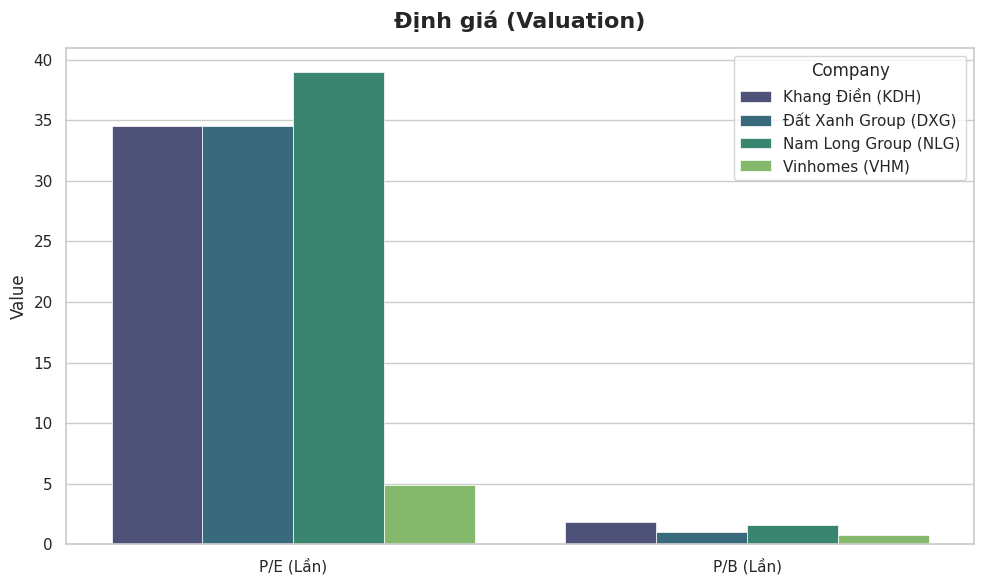

In [47]:
df = read_file("doithu.csv")

# Đổi tên cột đầu cho rõ
df.rename(columns={df.columns[0]: "Metric"}, inplace=True)

# -----------------------------
# 2. Chuyển từ wide → long (rất quan trọng)
# -----------------------------
df_long = df.melt(
    id_vars="Metric",
    var_name="Company",
    value_name="Value"
)

# -----------------------------
# 3. Lọc chỉ các chỉ số định giá (đúng như biểu đồ bạn vẽ)
# -----------------------------
valuation_metrics = ["P/E (Lần)", "P/B (Lần)"]
df_plot = df_long[df_long["Metric"].isin(valuation_metrics)]

sns.set_theme(style="whitegrid")

custom_palette = [
    "#484c7f",  # KDH
    "#2d7086",  # DXG
    "#2d9276",  # NLG
    "#7fc65e"   # VHM
]

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df_plot,
    x="Metric",
    y="Value",
    hue="Company",
    palette=custom_palette,
    edgecolor="white",
    linewidth=0.5
)

plt.title("Định giá (Valuation)", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("")
plt.ylabel("Value")

plt.legend(title="Company", frameon=True)
plt.tight_layout()
plt.show()



# **5. Phân tích kỹ thuật**


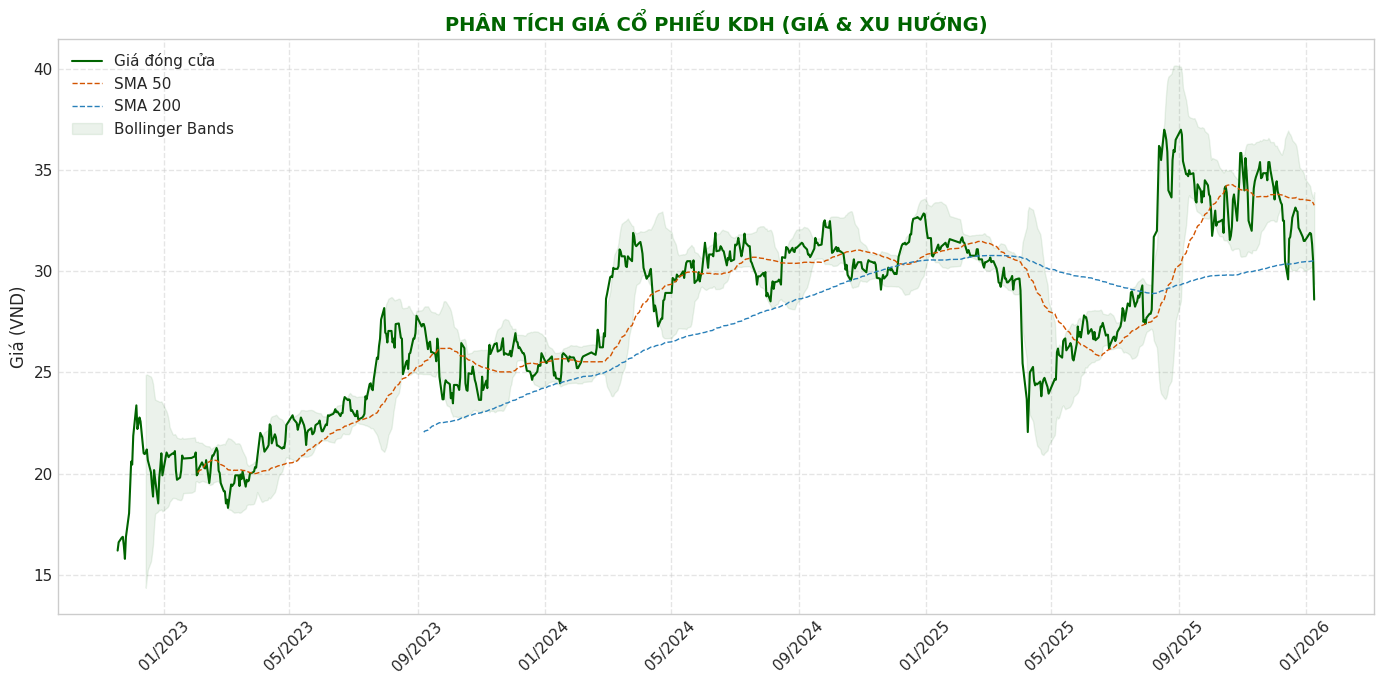

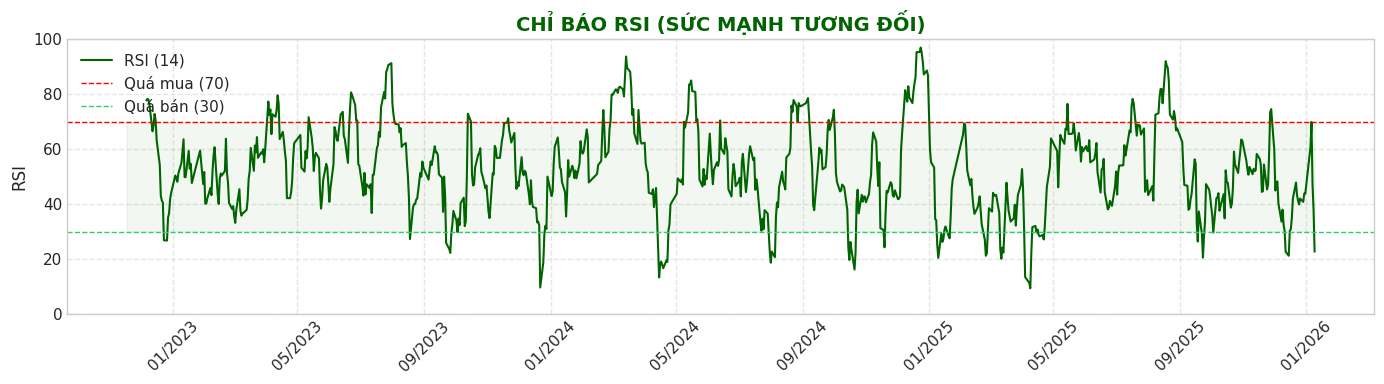

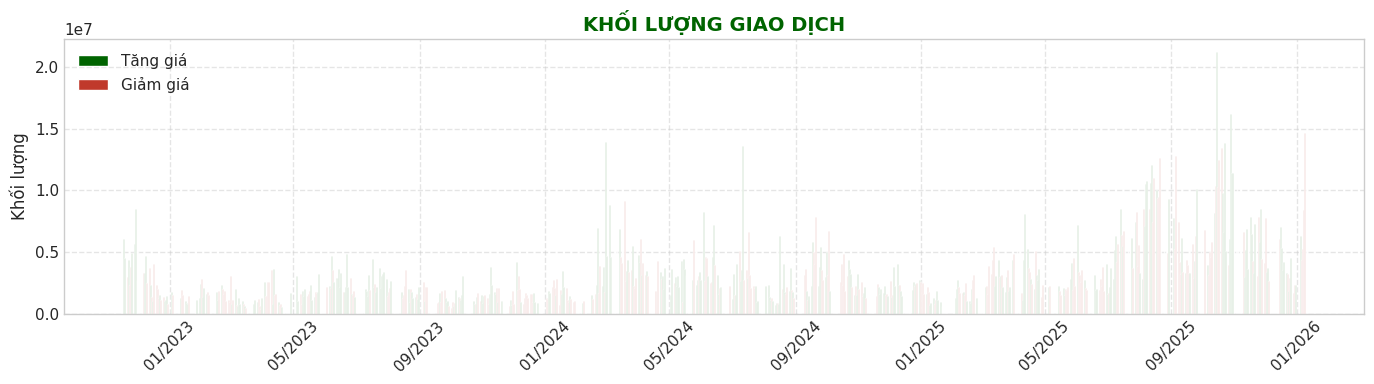

In [48]:
df = df_finance


df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Date']).sort_values('Date')

# --- TÍNH TOÁN CHỈ BÁO (Giữ nguyên) ---
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
df['BB_Middle'] = df['Close'].rolling(window=20).mean()
df['BB_Std'] = df['Close'].rolling(window=20).std()
df['BB_Upper'] = df['BB_Middle'] + 2 * df['BB_Std']
df['BB_Lower'] = df['BB_Middle'] - 2 * df['BB_Std']

delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# --- CẤU HÌNH GIAO DIỆN ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Times New Roman', 'Verdana']
plt.rcParams['axes.unicode_minus'] = False
date_fmt = mdates.DateFormatter('%m/%Y')

# ---------------------------------------------------------
# HÌNH 1: BIỂU ĐỒ GIÁ (Màu chủ đạo: Darkgreen)
# ---------------------------------------------------------
plt.figure(figsize=(14, 7))
# 1. Đổi màu đường giá sang darkgreen
plt.plot(df['Date'], df['Close'], label='Giá đóng cửa', color='darkgreen', linewidth=1.5)

# Các đường SMA giữ màu tương phản để dễ nhìn, nhưng có thể chỉnh sang tông vàng/cam
plt.plot(df['Date'], df['SMA_50'], label='SMA 50', color='#d35400', linestyle='--', linewidth=1) # Màu bí ngô
plt.plot(df['Date'], df['SMA_200'], label='SMA 200', color='#2980b9', linestyle='--', linewidth=1) # Màu xanh dương

# 2. Đổi màu nền Bollinger Bands sang xanh lá nhạt
plt.fill_between(df['Date'], df['BB_Upper'], df['BB_Lower'], color='darkgreen', alpha=0.08, label='Bollinger Bands')

# 3. Đổi màu tiêu đề sang darkgreen
plt.title('PHÂN TÍCH GIÁ CỔ PHIẾU KDH (GIÁ & XU HƯỚNG)', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Giá (VND)')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# HÌNH 2: BIỂU ĐỒ RSI (Màu chủ đạo: Darkgreen)
# ---------------------------------------------------------
plt.figure(figsize=(14, 4))
# 1. Đổi đường RSI sang darkgreen
plt.plot(df['Date'], df['RSI'], color='darkgreen', label='RSI (14)', linewidth=1.5)

plt.axhline(70, color='red', linestyle='--', linewidth=1, label='Quá mua (70)')
plt.axhline(30, color='#2ecc71', linestyle='--', linewidth=1, label='Quá bán (30)') # Xanh lá tươi hơn cho mốc 30

# 2. Đổi màu fill nền RSI sang xanh lá
plt.fill_between(df['Date'], 70, 30, color='darkgreen', alpha=0.05)

plt.title('CHỈ BÁO RSI (SỨC MẠNH TƯƠNG ĐỐI)', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('RSI')
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# HÌNH 3: BIỂU ĐỒ KHỐI LƯỢNG (Màu chủ đạo: Darkgreen)
# ---------------------------------------------------------
plt.figure(figsize=(14, 4))

# 1. Logic màu sắc: Tăng giá là Darkgreen, Giảm giá là Đỏ gạch (IndianRed)
colors = ['darkgreen' if c >= o else '#c0392b' for c, o in zip(df['Close'], df['Open'])]

plt.bar(df['Date'], df['Volume'], color=colors, alpha=0.8, label='Khối lượng')

plt.title('KHỐI LƯỢNG GIAO DỊCH', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Khối lượng')
# Tạo legend giả để hiển thị đúng màu chú thích
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='darkgreen', label='Tăng giá'),
                   Patch(facecolor='#c0392b', label='Giảm giá')]
plt.legend(handles=legend_elements, loc='upper left')

plt.gca().xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **6. Rủi ro & Kịch bản**

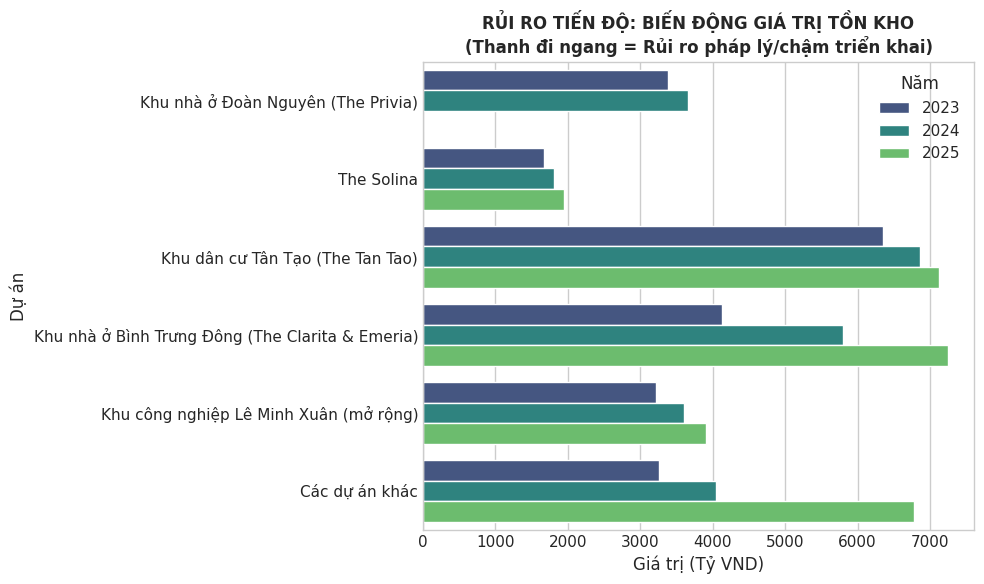

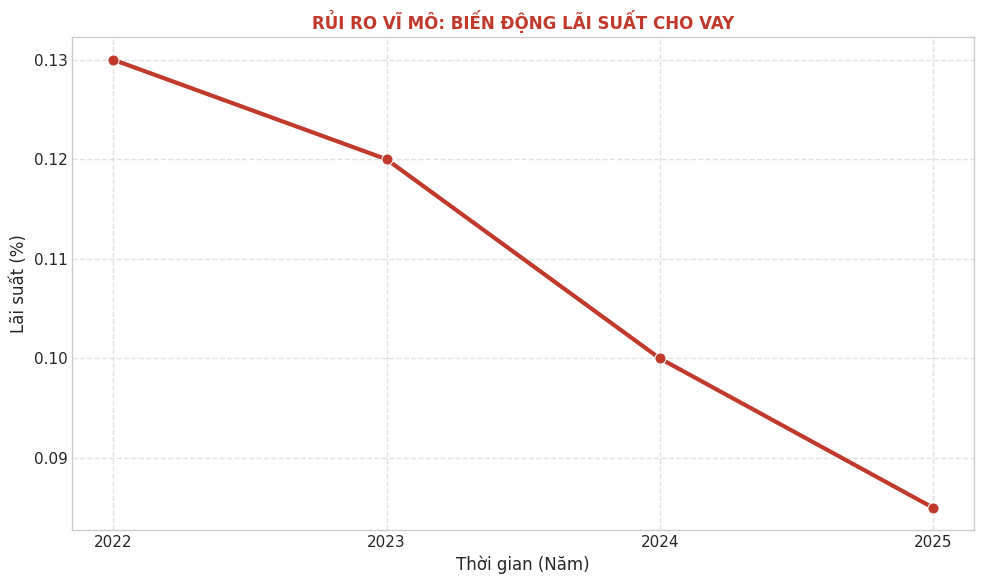

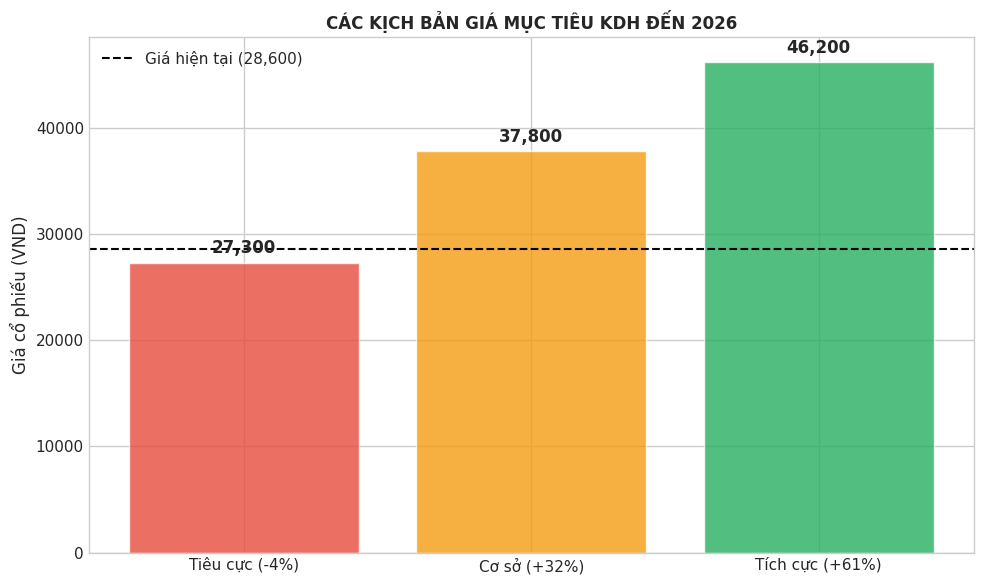

In [49]:


# 2. XỬ LÝ DỮ LIỆU RỦI RO DỰ ÁN
proj_cols = {
    'Tên dự án': 'Project',
    'Giá trị tại 2023\n(Đơn vị: Tỷ VND)': '2023',
    'Giá trị tại 2024\n(Đơn vị: Tỷ VND)': '2024',
    'Giá trị tại Quý 3/2025\n(Đơn vị: Tỷ VND)': '2025'
}
df_p = df_project.rename(columns=proj_cols).dropna(subset=['Project'])
df_p_melt = df_p.melt(id_vars=['Project'], value_vars=['2023', '2024', '2025'], var_name='Year', value_name='Value')

# 3. XỬ LÝ DỮ LIỆU RỦI RO LÃI SUẤT
def get_avg_rate(s):
    nums = re.findall(r"[\d\.]+", str(s))
    return np.mean([float(n) for n in nums]) if nums else 0

df_macro['Lãi suất TB'] = df_macro['Lãi suất cho vay\n(đơn vị: %)'].apply(get_avg_rate)

# --- PHẦN VẼ BIỂU ĐỒ (ĐÃ TÁCH RIÊNG) ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Times New Roman', 'Verdana']
plt.rcParams['axes.unicode_minus'] = False

# -----------------------------------------------------------
# FIGURE 1: BIỂU ĐỒ RỦI RO DỰ ÁN (Bar Chart)
# -----------------------------------------------------------
plt.figure(figsize=(10, 6)) # Tạo figure mới
sns.barplot(data=df_p_melt, x='Value', y='Project', hue='Year', palette='viridis')

plt.title('RỦI RO TIẾN ĐỘ: BIẾN ĐỘNG GIÁ TRỊ TỒN KHO\n(Thanh đi ngang = Rủi ro pháp lý/chậm triển khai)', fontweight='bold')
plt.xlabel('Giá trị (Tỷ VND)')
plt.ylabel('Dự án')
plt.legend(title='Năm')
plt.tight_layout()
plt.savefig('KDH_Part6_Risks_Project.png') # Lưu file riêng
plt.show()

# -----------------------------------------------------------
# FIGURE 2: BIỂU ĐỒ RỦI RO VĨ MÔ (Line Chart)
# -----------------------------------------------------------
plt.figure(figsize=(10, 6)) # Tạo figure mới

# Vẽ đường
sns.lineplot(data=df_macro, x='Thời gian (Năm)', y='Lãi suất TB',
             marker='o', color='#c0392b', linewidth=3, markersize=8)

plt.title('RỦI RO VĨ MÔ: BIẾN ĐỘNG LÃI SUẤT CHO VAY', fontweight='bold', color='#c0392b')
plt.ylabel('Lãi suất (%)')
plt.grid(True, linestyle='--', alpha=0.6)

# Chỉ định rõ các mốc năm trên trục X để tránh hiện số thập phân (như 2022.5)
plt.xticks(df_macro['Thời gian (Năm)'].unique())

plt.tight_layout()
plt.savefig('KDH_Part6_Risks_Macro.png') # Lưu file riêng
plt.show()

# -----------------------------------------------------------
# FIGURE 3: BIỂU ĐỒ KỊCH BẢN ĐỊNH GIÁ (Bar Chart)
# -----------------------------------------------------------
plt.figure(figsize=(10, 6)) # Tạo figure mới
scenarios = ["Tiêu cực (-4%)", "Cơ sở (+32%)", "Tích cực (+61%)"]
prices = [27300, 37800, 46200]
bars = plt.bar(scenarios, prices, color=['#e74c3c', '#f39c12', '#27ae60'], alpha=0.8)

plt.axhline(28600, color='black', linestyle='--', label='Giá hiện tại (28,600)')

# Thêm nhãn giá tiền lên đầu cột (Tùy chọn thêm cho đẹp)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 500,
             f'{height:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.title('CÁC KỊCH BẢN GIÁ MỤC TIÊU KDH ĐẾN 2026', fontweight='bold')
plt.ylabel('Giá cổ phiếu (VND)')
plt.legend()
plt.tight_layout()
plt.savefig('KDH_Part6_Scenarios.png')
plt.show()